<a href="https://colab.research.google.com/github/Mahmoudkheradmandi/N-Queen--Genetic-Alg/blob/main/N_Queen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from random import randint as rnd
from random import shuffle
import matplotlib.pyplot as plt

In [ ]:
# Setting Parameters
N = 10
PS = 200 # Population Size
MR = 0.8 # Mutation Rate
EPOCH = 200

In [ ]:
# Initial population Function
def init_population(n , ps):
    population_list = []
    for i in range(ps):
        member = []
        for j in range(n):
           member.append(rnd(0 , n-1))

        population_list.append(member + [None]) # The last column [None] is our scores section
    return population_list

In [ ]:
# Cross_Over Function
def cross_over(population_list , n , ps):
    for i in range(0 , ps , 2):
    # We produce 2 children from each family
        child1 = population_list[i][:n//2]+population_list[i+1][n//2:n]+ [None] # The last column [None] is our scores section
        child2 = population_list[i+1][:n//2]+population_list[i][n//2:n]+ [None] # The last column [None] is our scores section
        population_list.append(child1)
        population_list.append(child2)
    return population_list

In [ ]:
# Mutation Function
def mutation(population_list , n , ps , mr):
    # In this case, the children are selected randomly
    choosen_ones = list(range(ps , ps*2)) # Inside the main list, we find the children section and add it to the new list
    shuffle(choosen_ones)
    choosen_ones = choosen_ones[:int(ps*mr)]
    for i in choosen_ones:
        cell = rnd(0 , n-1)
        val = rnd(0 , n-1)
        population_list[i][cell] = val
    return population_list

In [ ]:
# Fitness Function
def fitness(population_list , n):
    length = len(population_list)
    for i in range(length):
        rate = 0
        for j in range(n):
            for k in range(j+1 , n):
                # Column
                if population_list[i][j] == population_list[i][k]:
                    rate+=1
                # diogonal
                if abs(j-k) == abs(population_list[i][j] - population_list[i][k]):
                    rate+=1
        population_list[i][-1] = rate
    return population_list

In [ ]:
# Presentation Function
def show(solution , n):
    plt.figure(figsize=(5,5))
    for i in range(n+1):
        plt.plot([0,n*2],[i*2,i*2])
        plt.plot([i*2,i*2],[0,n*2])
    for i in range(n):
      plt.scatter([i*2+1] , [solution[i]*2+1])
    plt.show()

1 Best solution so far [5, 1, 4, 7, 0, 6, 3, 6, 0, 3, 3]
2 Best solution so far [5, 1, 4, 7, 0, 6, 3, 6, 0, 3, 3]
3 Best solution so far [5, 1, 4, 7, 0, 6, 3, 6, 0, 3, 3]
4 Best solution so far [5, 1, 4, 7, 0, 6, 3, 6, 0, 3, 3]
5 Best solution so far [5, 1, 4, 7, 0, 6, 3, 6, 0, 3, 3]
6 Best solution so far [5, 1, 4, 7, 0, 3, 9, 2, 8, 8, 2]
7 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
8 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
9 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
10 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
11 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
12 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
13 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
14 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
15 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
16 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
17 Best solution so far [5, 1, 4, 7, 0, 3, 9, 6, 8, 2, 1]
18 Best solution so far

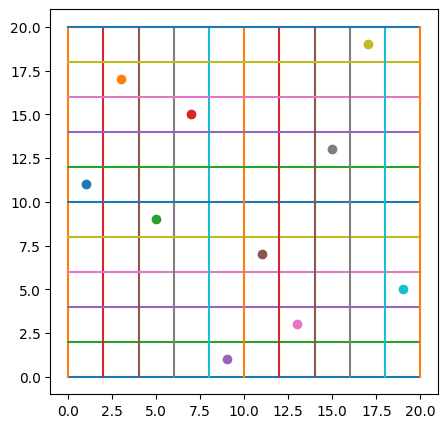

In [ ]:
# Main :
# Primary population production

current_population = init_population(N , PS)
current_population = fitness(current_population , N)
current_population = sorted(current_population , key=lambda x:x[-1])
if current_population[0][-1] == 0 :
    print('Solution is found in the initial population stage' , current_population[0])
    show(current_population[0] , N)
else :
    for i in range(EPOCH):
        current_population = cross_over(current_population , N , PS)
        current_population = mutation(current_population , N , PS , MR)
        current_population = fitness(current_population , N)
        current_population = sorted(current_population , key=lambda x:x[-1])
        current_population = current_population[:PS] # It only displays the parent section
        if current_population[0][-1] == 0 :
            print (i+1 ,'Solution Found' , current_population[0])
            show(current_population[0],N)
            break
        else :
            print (i+1 ,'Best solution so far' , current_population[0])
    else:
        print ('Sorry , we could not find you a soluution')